# Brand Grouping and Proximity

## Uses Singular Value Decomposition to extract similarity data from adjacent brands

Import resources

In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

Read data

In [2]:
df = pd.read_csv('cbg_patterns.csv')

Clean data

In [3]:
df.top_brands = df.top_brands.apply(lambda x: ast.literal_eval(x))
top_brands = df["top_brands"]

Get the names of top 20 brands

In [4]:
brand_dict = {}
for brand_list in top_brands:
    for brand in brand_list:
        brand_dict[brand] = brand_dict.get(brand, 0) + 1
top_20_brands =set(sorted(list(brand_dict), key=lambda key: brand_dict[key])[-20:])

Construct empty matrix for adjacency data

In [5]:
brand_matrix = pd.DataFrame(0, index=top_20_brands, columns=top_20_brands, dtype=int)

Calculate adjacency for each pair of brands

In [6]:
for brands in top_brands:
    for brand in brands:
        if brand in top_20_brands:
            for peer in brands:
                if peer in top_20_brands:
                    if brand != peer:
                        brand_matrix[brand][peer] += 1

Apply SVD to adjacency matrix

In [7]:
matrix = brand_matrix.to_numpy()
u, s, v = np.linalg.svd(matrix)

Use the first two vectors of U to map similar brands together

<IPython.core.display.Javascript object>


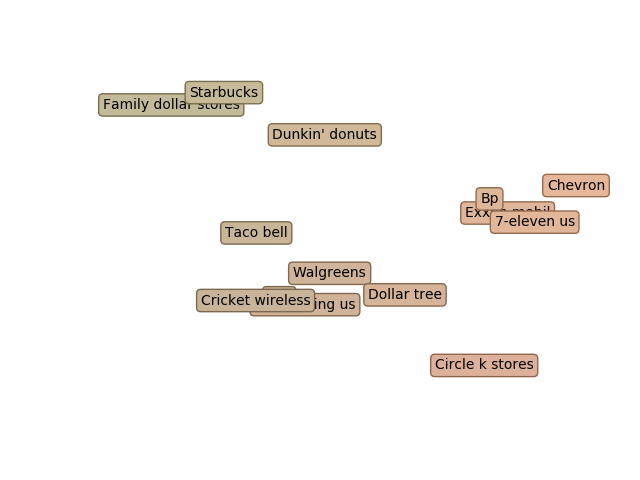

In [8]:
min_x, max_x, min_y, max_y = min(u[:,0]), max(u[:,0]), min(u[:,1]), max(u[:,1])
scale_x = 0.5 /(max_x - min_x)
scale_y = 0.5 /(max_y - min_y)
for i in range(0,len(brand_matrix)):
    plt.text(u[i,0], u[i,1], brand_matrix.index[i].capitalize(), ha="center", va="center", 
             bbox=dict(boxstyle="round",
                   ec=(0.1 + (u[i,0] - min_x) * scale_x, 
                       0.1 + (u[i,1] - min_y) * scale_y, 
                       0.3),
                   fc=(0.4 + (u[i,0] - min_x) * scale_x, 
                       0.4 + (u[i,1] - min_y) * scale_y, 
                       0.6),))

plt.ylim(min_y, max_y)
plt.xlim(min_x, max_x)
plt.axis('off')
plt.show()